In [ ]:
https://www.kaggle.com/synnfusion/softmax-on-mnist-from-scratch

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_valid = train_test_split(x_train, test_size=0.085, shuffle=False)
Y_train, Y_valid = train_test_split(y_train, test_size=0.085, shuffle=False)


In [6]:
X_train.shape

(54900, 28, 28)

In [7]:
X_valid.shape

(5100, 28, 28)

In [8]:
Y_valid

array([0, 1, 5, ..., 5, 6, 8], dtype=uint8)

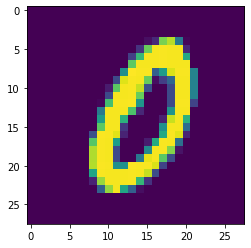

In [9]:
plt.imshow(X_valid[0])

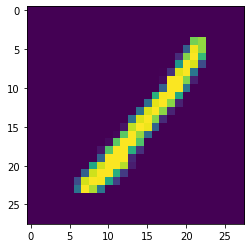

In [10]:
plt.imshow(X_valid[1])

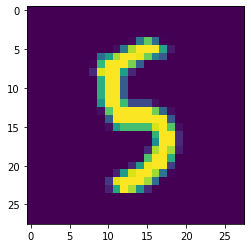

In [11]:
plt.imshow(X_valid[2])

In [12]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

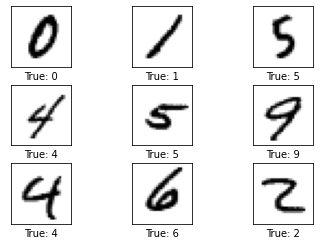

In [13]:
plot_images(images=X_valid[0:9], cls_true=Y_valid[0:9])

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)


shuffle_index = np.random.permutation(70000)
X, Y = mnist["data"][shuffle_index]/255, mnist["target"][shuffle_index]

x_train, x_test, y_train, y_test = X[:60000], X[60000:], Y[:60000].astype(int), Y[60000:].astype(int)



In [15]:
def naive_compute_probabilities(X, theta):

    k = theta.shape[0]
    n = X.shape[0]
    H = np.zeros([k,n])

    for i in range(n):
        dpoint = X[i]
        c_vector = np.zeros(k)
        for j in range(k):
            c_vector[j] = (np.dot(theta[j], dpoint))
            c = np.amax(c_vector)
        summation = 0
        
        for j in range(k): 
            exponent = np.dot(theta[j], dpoint) - c
            summation += np.exp(exponent)
            H[j][i] = np.exp(exponent)

        H[:,i] = H[:,i]/summation

    return H

In [16]:
import time

theta = np.zeros([10, 784])

start = time.time()
probs = naive_compute_probabilities(x_train.reshape(len(x_train),784), theta)
end = time.time()
end - start

7.995183706283569

In [17]:
#theta randomly initialized

#theta = np.random.randint(0, 10, [10,x_train.shape[1]])

In [18]:
a = np.array([1,2,3,4,5])
b = np.array([8,8,8,8,8])

a_dot_b = sum([a[i]*b[i] for i in range(len(a))])
a_dot_b

120

In [19]:
np.dot(a,b)

120

In [20]:
def vectorized_compute_probabilities(X, theta):
    
    theta_XT = np.matmul(theta, np.transpose(X))

    c = np.amax(theta_XT, axis = 0)

    exp_matrix = np.exp(theta_XT - c)

    sum_vector = np.sum(exp_matrix, axis = 0)

    return exp_matrix/sum_vector

In [21]:
#この計算の方がはやい

In [22]:
theta = np.zeros([10, 784])

start = time.time()
probs = vectorized_compute_probabilities(x_train.reshape(len(x_train),784), theta)
end = time.time()
end - start

0.16210365295410156

In [23]:
import scipy.sparse as sparse

def gradient_descent_iteration(X, Y, theta, alpha, lambda_factor):
    
    n = len(Y)
    k = theta.shape[0]
    data = [1]*n
    
    H = vectorized_compute_probabilities(X, theta)
    M = sparse.coo_matrix((data, (Y, range(n))), shape=(k,n)).toarray()
    
    first_term = np.matmul(M-H, X)*(-1/n)
    second_term = lambda_factor * theta

    return theta - alpha * (first_term + second_term)

In [24]:
n = len(y_train)
data = [1]*n

In [25]:
k = 10

In [26]:
M = sparse.coo_matrix((data, (y_train, range(n))), shape=(k,n)).toarray()
M.shape

In [27]:
def my_predict(X, theta):
    X = augment_feature_vector(X)
    probabilities = vectorized_compute_probabilities(X, theta)
    return np.argmax(probabilities, axis = 0)

In [35]:
def compute_accuracy(X, Y, theta):
    predictions = my_predict(X, theta)
    return np.mean(predictions == Y), predictions

In [29]:
def softmax_regression(X, Y, alpha, lambda_factor, k, num_iterations):   
    
    X = augment_feature_vector(X)
    theta = np.zeros([k, X.shape[1]])
    for i in range(num_iterations):
        theta = gradient_descent_iteration(X, Y, theta, alpha, lambda_factor)
    
    return theta

In [31]:
def augment_feature_vector(X):
    return np.hstack((np.ones([len(X), 1]), X))

In [32]:
theta_final = softmax_regression(x_train.reshape(len(x_train),784), y_train, alpha = .3, 
                           lambda_factor = 1.0e-4, k = 10, num_iterations = 100)

In [36]:
acc, pred = compute_accuracy(x_train.reshape(len(x_train),784), y_train, theta_final)

In [37]:
acc

0.8864166666666666

In [39]:
y_train

array([0, 5, 8, ..., 6, 0, 4])

In [38]:
pred

array([0, 5, 8, ..., 6, 0, 4])

In [40]:
acc, pred = compute_accuracy(x_test, y_test, theta_final)
acc

0.8883

In [42]:
theta_final.shape

(10, 785)

In [ ]:
x_train.shape

In [ ]:
y_train.shape